In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import torch
import torchvision

In [10]:
trainingdata = torchvision.datasets.MNIST('./MNIST',train=True, transform=torchvision.transforms.ToTensor(), download=True)
testdata = torchvision.datasets.MNIST('./MNIST',train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [11]:
print(len(trainingdata), len(testdata))

60000 10000


## 1. Tensor manipulations. 


```
a) show 5 numbers
```




torch.Size([1, 28, 28]) 5


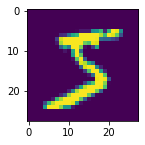

torch.Size([1, 28, 28]) 0


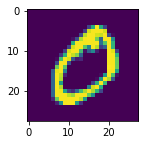

torch.Size([1, 28, 28]) 4


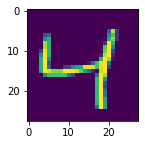

torch.Size([1, 28, 28]) 1


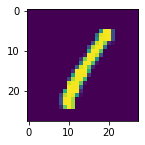

torch.Size([1, 28, 28]) 9


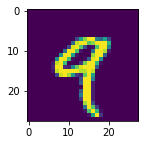

In [122]:
for i in range (5):
  image, label = trainingdata[i]
  print(image.shape, label)
  plt.figure(figsize=(2,4))
  plt.imshow(image.squeeze().numpy())
  plt.show(fig)



```
b) 3rd number rotated counterclockwise using the flip and transpose functions in numpy
```



torch.Size([1, 28, 28]) 4


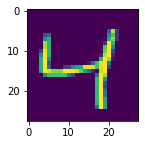

(28, 28)


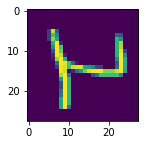

(28, 28)


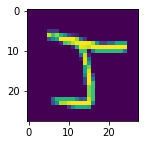

In [124]:
image, label = trainingdata[2]
print(image.shape, label)
im= image.squeeze().numpy()
plt.figure(figsize=(2,4))
plt.imshow(im) #original
plt.show()
print(np.flip(im, axis=1).shape)
plt.figure(figsize=(2,4))
plt.imshow(np.flip(im, axis=1)) #flip
plt.show()
print(np.transpose(np.flip(im, axis=1)).shape)
plt.figure(figsize=(2,4))
plt.imshow(np.transpose(np.flip(im, axis=1))) #flip & transpose
plt.show()



```
c) Create a batch of MNIST digits and flatten it to a single vector.
```



In [100]:
traindataloader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=False)
print(traindataloader)

In [101]:
images, labels = iter(traindataloader).next()
print(images.size(), labels)
flat_ten= torch.flatten(images)
print(flat_ten.size()) # flatten tensor = 16x1x28x28 = 12544

torch.Size([16, 1, 28, 28]) tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7])
torch.Size([12544])




```
d) Visualize  all : numbers  in the batch  vertically 
```



(16, 28, 28)


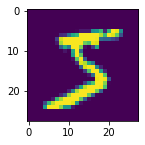

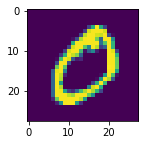

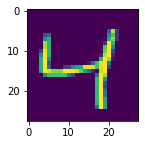

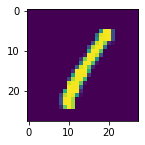

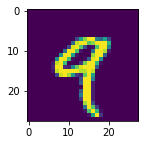

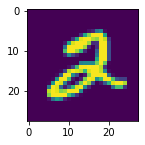

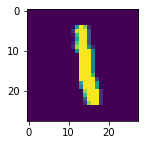

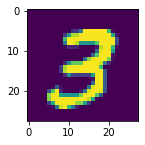

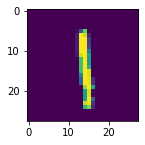

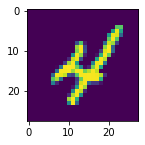

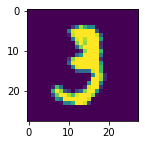

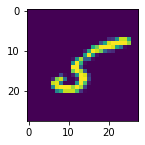

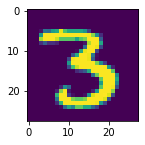

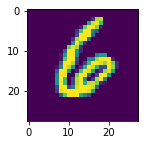

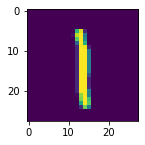

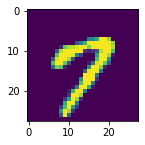

In [139]:
im= images.squeeze().numpy()
print(im.shape)
for i in range(16):
  plt.figure(figsize=(2,4))
  plt.imshow(im[i])
  plt.show()



```
e) Visualize  all numbers  in the batch  horizontally 

```



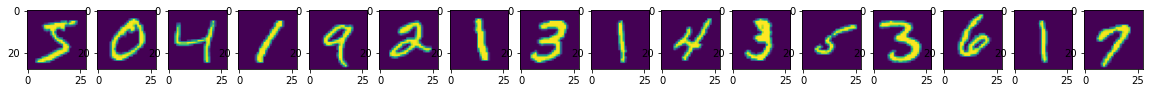

In [138]:
fig, ax = plt.subplots(1,16, figsize=(20,2))
for i in range(16):
    ax[i].imshow(im[i])
    plt.show



```
f) Split the batch dimension into two new batches and plot horizontally.
```



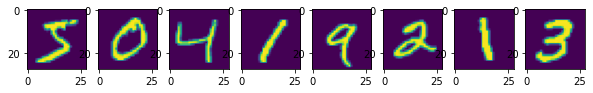

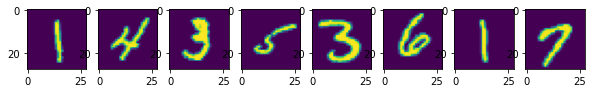

In [143]:
im_1= im[:8] #1st split
im_2= im[8:] #2nd split

fig, ax = plt.subplots(1,8, figsize=(10,2))
for i in range(8):
    ax[i].imshow(im_1[i])
    plt.show
fig, ax = plt.subplots(1,8, figsize=(10,2))
for i in range(8):
    ax[i].imshow(im_2[i])
    plt.show

## 2. More fun with tensor manipulations and plotting.



```
a) Normalize the batch of data [0,1].
```



In [ ]:
normalized_batch= images/255.0
print(normalized_batch.shape)
print(normalized_batch)



```
b) mean of each sample
```



In [162]:
mean=[]
for i in range(16):
  mean.append(float(torch.mean(images[i])))
print(mean)

[0.1376800686120987, 0.1555372178554535, 0.09725390374660492, 0.08570928871631622, 0.11611644923686981, 0.14806422591209412, 0.0882653146982193, 0.1794067621231079, 0.05439175292849541, 0.10956382751464844, 0.14279711246490479, 0.07127851247787476, 0.17887656390666962, 0.14227192103862762, 0.05813325569033623, 0.12653060257434845]




```
c) Plot the means in a histogram
```



(array([2., 1., 2., 1., 2., 1., 1., 3., 1., 2.]),
 array([0.05439175, 0.06689325, 0.07939475, 0.09189626, 0.10439776,
        0.11689926, 0.12940076, 0.14190226, 0.15440376, 0.16690526,
        0.17940676]),
 <a list of 10 Patch objects>)

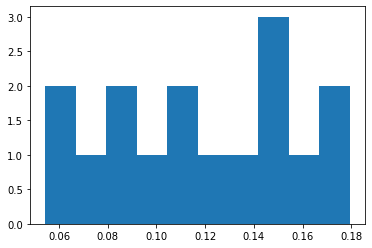

In [163]:
plt.hist(mean)